In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
# Load the dataset
df = pd.read_csv('seattle-weather.csv')

In [19]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [20]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [22]:
# Data Preprocessing
df['date'] = pd.to_datetime(df['date'])
label_encoder = LabelEncoder()
df['weather_encoded'] = label_encoder.fit_transform(df['weather'])

# Categorical Graph

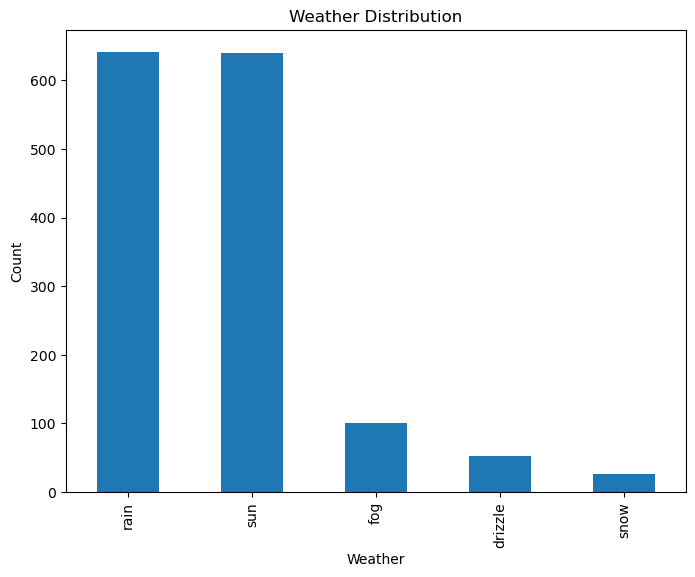

In [23]:
def plot_categorical_graph(df):
    """Plot a bar chart for the 'weather' column."""
    plt.figure(figsize=(8, 6))
    df['weather'].value_counts().plot(kind='bar')
    plt.title('Weather Distribution')
    plt.xlabel('Weather')
    plt.ylabel('Count')
    plt.show()

plot_categorical_graph(df)


# Relational Graph 

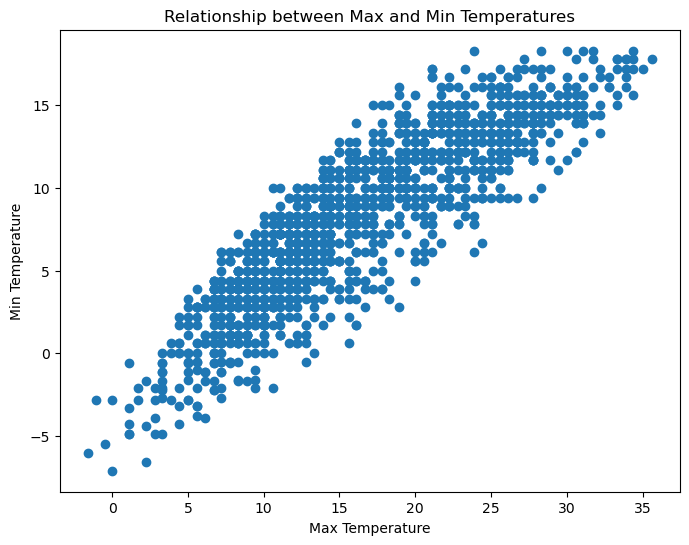

In [24]:
def plot_relational_graph(df):
    """Plot a scatter graph of 'temp_max' against 'temp_min'."""
    plt.figure(figsize=(8, 6))
    plt.scatter(df['temp_max'], df['temp_min'])
    plt.title('Relationship between Max and Min Temperatures')
    plt.xlabel('Max Temperature')
    plt.ylabel('Min Temperature')
    plt.show()

plot_relational_graph(df)


# Statistical graph

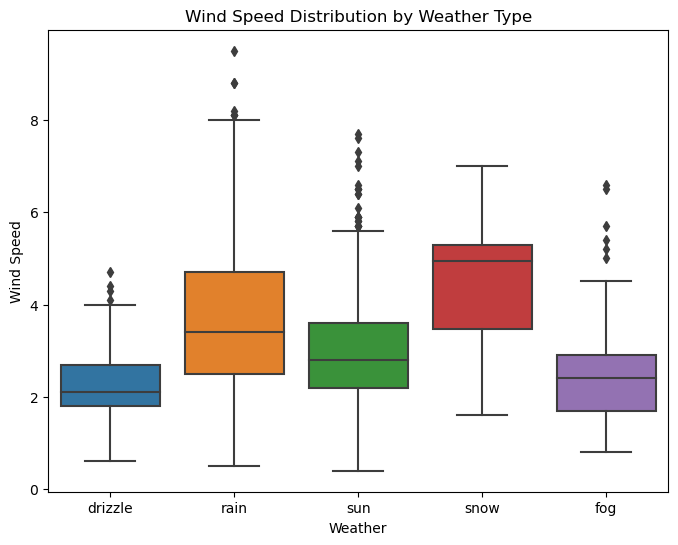

In [25]:
def plot_statistical_graph(df):
    """Plot a box plot for 'wind' and 'weather'."""
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='weather', y='wind', data=df)
    plt.title('Wind Speed Distribution by Weather Type')
    plt.xlabel('Weather')
    plt.ylabel('Wind Speed')
    plt.show()

plot_statistical_graph(df)


# Elbow plot

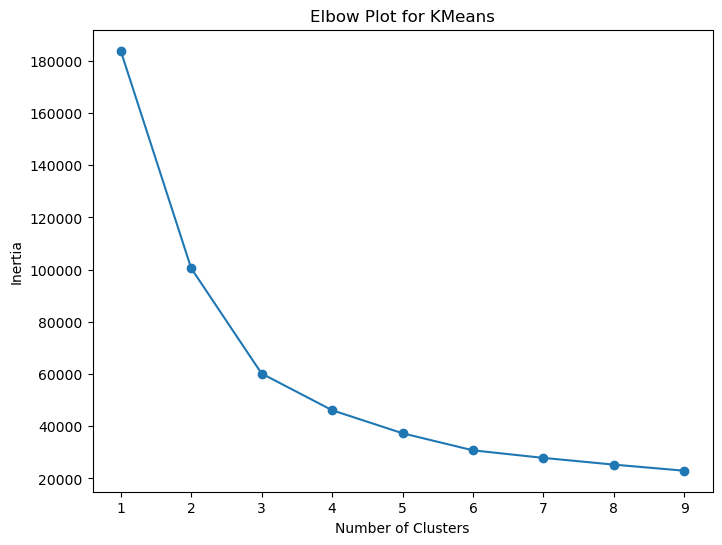

In [26]:
import warnings
warnings.filterwarnings("ignore")
def plot_elbow(X):
    """Plot an elbow plot for KMeans clustering."""
    inertia = []
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
        inertia.append(kmeans.inertia_)
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 10), inertia, marker='o')
    plt.title('Elbow Plot for KMeans')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()
plot_elbow(df[['precipitation', 'temp_max', 'temp_min', 'wind']])

# K-means clustering

In [27]:
def kmeans_clustering(df):
    """Perform KMeans clustering."""
    X = df[['precipitation', 'temp_max', 'temp_min', 'wind']]
    kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
    df['cluster'] = kmeans.labels_
    return df
def evaluate_clustering(X):
    """Evaluate KMeans clustering using silhouette score."""
    kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    print("The average silhouette score is:", silhouette_avg)
    return silhouette_avg


In [28]:
df_clustered = kmeans_clustering(df)
silhouette_avg = evaluate_clustering(df[['precipitation', 'temp_max', 'temp_min', 'wind']])

The average silhouette score is: 0.4900994814002572


In [29]:
print("Clustered Data:")
df_clustered.head()

Clustered Data:


,date,precipitation,temp_max,temp_min,wind,weather,weather_encoded,cluster
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2,0
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2,0
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2,0


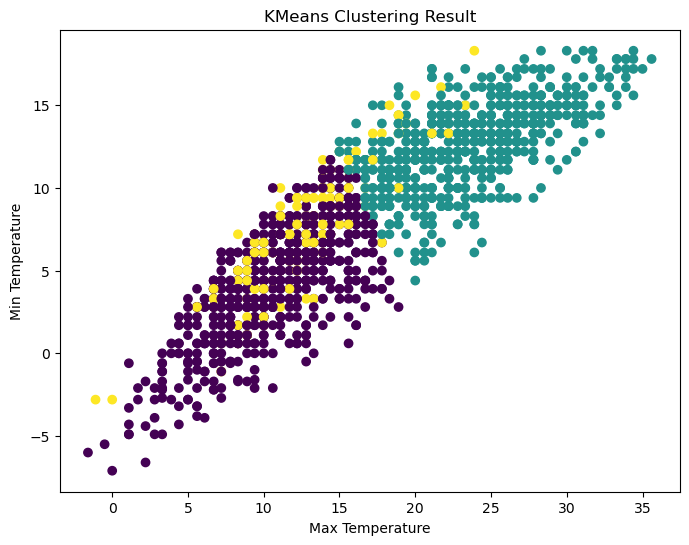

In [30]:
# Scatter plot of clustered data points
plt.figure(figsize=(8, 6))
plt.scatter(df['temp_max'], df['temp_min'], c=df['cluster'], cmap='viridis')
plt.title('KMeans Clustering Result')
plt.xlabel('Max Temperature')
plt.ylabel('Min Temperature')
plt.show()


# Fitting line

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
def fit_linear_regression(X, y):
    """
    Fit a linear regression model to the data.
    Parameters:
    - X (DataFrame): The input features.
    - y (Series): The target variable.
    Returns:
    - reg (LinearRegression): The fitted linear regression model.
    - r2 (float): The coefficient of determination (R-squared).
    - mse (float): The mean squared error (MSE).
    """
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    return reg, r2, mse
X_temp_max = df[['temp_max']]
y_temp_max = df['temp_max']
reg, r2, mse = fit_linear_regression(X_temp_max, y_temp_max)
print("R-squared:", r2)
print("Mean Squared Error:", mse)

R-squared: 1.0
Mean Squared Error: 6.600832264312606e-29
